# COVID-19 Data Chart of all Countries

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [26]:
df = pd.read_csv('Data/covid_19_data.csv')

In [27]:
df.head(20)

SNo ObservationDate  Province/State  Country/Region      Last Update  \
0     1      01/22/2020           Anhui  Mainland China  1/22/2020 17:00   
1     2      01/22/2020         Beijing  Mainland China  1/22/2020 17:00   
2     3      01/22/2020       Chongqing  Mainland China  1/22/2020 17:00   
3     4      01/22/2020          Fujian  Mainland China  1/22/2020 17:00   
4     5      01/22/2020           Gansu  Mainland China  1/22/2020 17:00   
5     6      01/22/2020       Guangdong  Mainland China  1/22/2020 17:00   
6     7      01/22/2020         Guangxi  Mainland China  1/22/2020 17:00   
7     8      01/22/2020         Guizhou  Mainland China  1/22/2020 17:00   
8     9      01/22/2020          Hainan  Mainland China  1/22/2020 17:00   
9    10      01/22/2020           Hebei  Mainland China  1/22/2020 17:00   
10   11      01/22/2020    Heilongjiang  Mainland China  1/22/2020 17:00   
11   12      01/22/2020           Henan  Mainland China  1/22/2020 17:00   
12   13      01/22/2020       Hong Kong       Hong Kong  1/22/2020 17:00   
13   14      01/22/2020           Hubei  Mainland China  1/22/2020 17:00   
14   15      01/22/2020           Hunan  Mainland China  1/22/2020 17:00   
15   16      01/22/2020  Inner Mongolia  Mainland China  1/22/2020 17:00   
16   17      01/22/2020         Jiangsu  Mainland China  1/22/2020 17:00   
17   18      01/22/2020         Jiangxi  Mainland China  1/22/2020 17:00   
18   19      01/22/2020           Jilin  Mainland China  1/22/2020 17:00   
19   20      01/22/2020        Liaoning  Mainland China  1/22/2020 17:00   

    Confirmed  Deaths  Recovered  
0         1.0     0.0        0.0  
1        14.0     0.0        0.0  
2         6.0     0.0        0.0  
3         1.0     0.0        0.0  
4         0.0     0.0        0.0  
5        26.0     0.0        0.0  
6         2.0     0.0        0.0  
7         1.0     0.0        0.0  
8         4.0     0.0        0.0  
9         1.0     0.0        0.0  
10        0.0     0.0        0.0  
11        5.0     0.0        0.0  
12        0.0     0.0        0.0  
13      444.0    17.0       28.0  
14        4.0     0.0        0.0  
15        0.0     0.0        0.0  
16        1.0     0.0        0.0  
17        2.0     0.0        0.0  
18        0.0     0.0        0.0  
19        2.0     0.0        0.0

In [28]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [31]:
df3 = df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [32]:
df3.head(20)

Country       Date  Confirmed  Deaths  Recovered
0        Azerbaijan 2020-02-28        1.0     0.0        0.0
1   ('St. Martin',) 2020-03-10        2.0     0.0        0.0
2       Afghanistan 2020-02-24        1.0     0.0        0.0
3       Afghanistan 2020-02-25        1.0     0.0        0.0
4       Afghanistan 2020-02-26        1.0     0.0        0.0
5       Afghanistan 2020-02-27        1.0     0.0        0.0
6       Afghanistan 2020-02-28        1.0     0.0        0.0
7       Afghanistan 2020-02-29        1.0     0.0        0.0
8       Afghanistan 2020-03-01        1.0     0.0        0.0
9       Afghanistan 2020-03-02        1.0     0.0        0.0
10      Afghanistan 2020-03-03        2.0     0.0        0.0
11      Afghanistan 2020-03-04        4.0     0.0        0.0
12      Afghanistan 2020-03-05        4.0     0.0        0.0
13      Afghanistan 2020-03-06        4.0     0.0        0.0
14      Afghanistan 2020-03-07        4.0     0.0        0.0
15      Afghanistan 2020-03-08        5.0     0.0        0.0
16      Afghanistan 2020-03-09        7.0     0.0        0.0
17      Afghanistan 2020-03-10        8.0     0.0        0.0
18      Afghanistan 2020-03-11       11.0     0.0        0.0
19      Afghanistan 2020-03-12       12.0     0.0        0.0

In [33]:
countries = df3['Country'].unique()
len(countries)

229

# Ploting each Countrie COVID Confirmed,Recovered,Deaths cases Trend

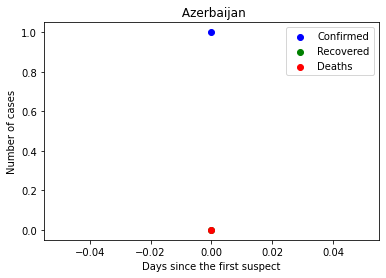

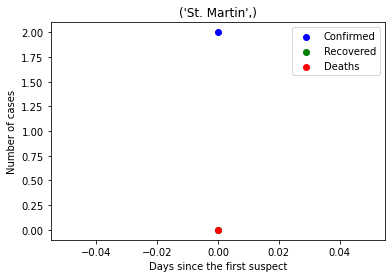

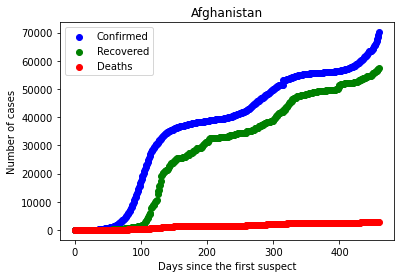

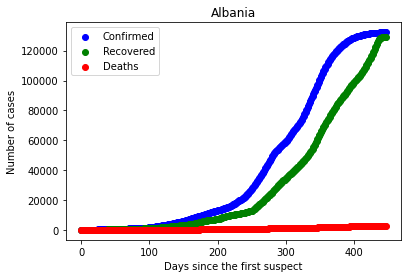

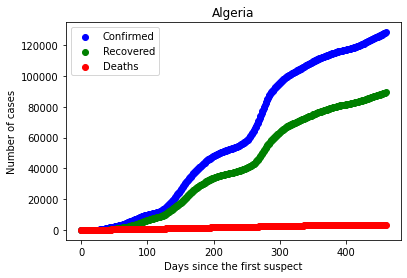

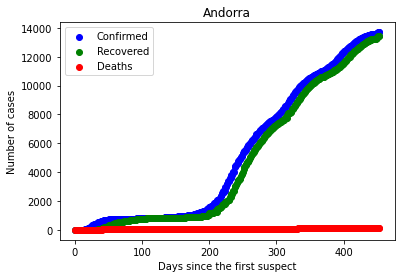

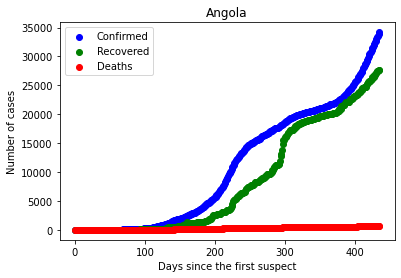

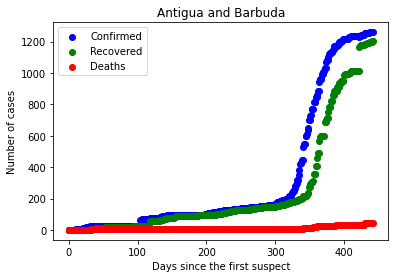

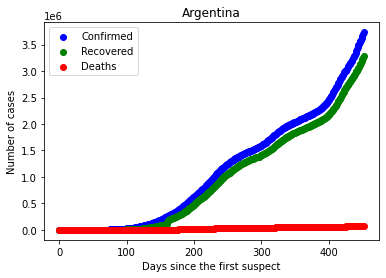

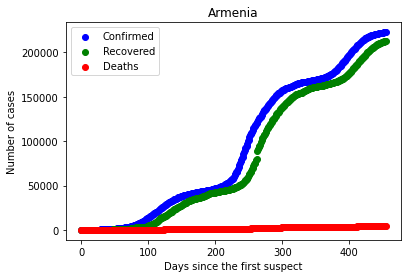

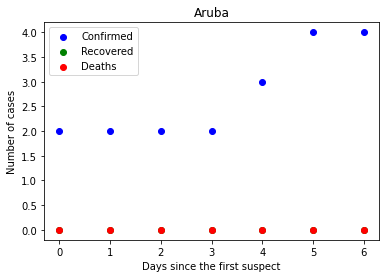

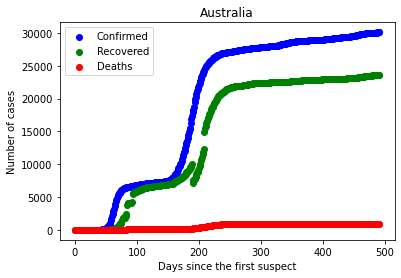

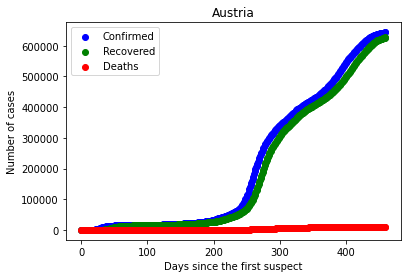

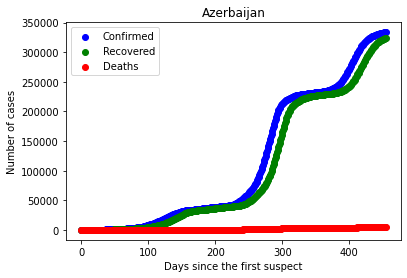

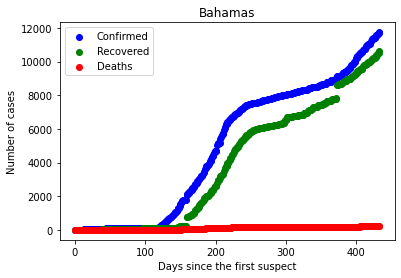

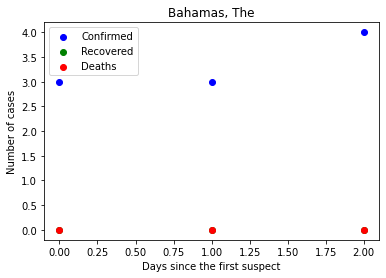

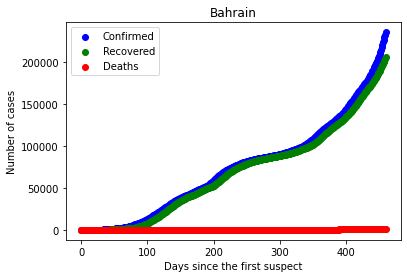

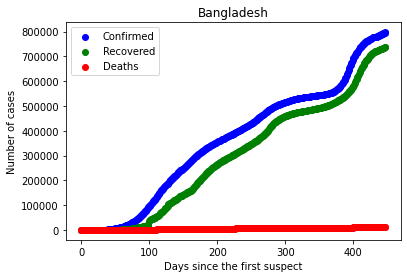

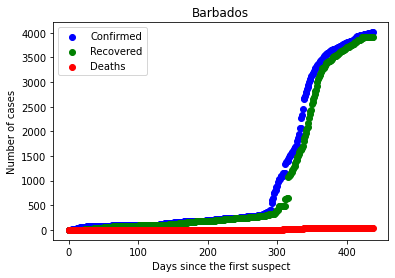

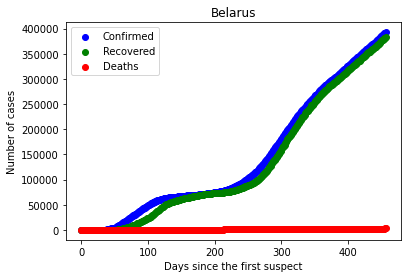

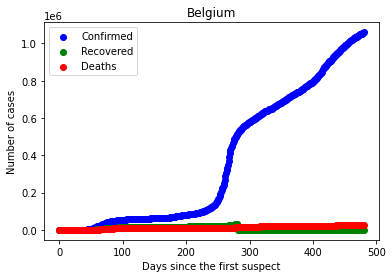

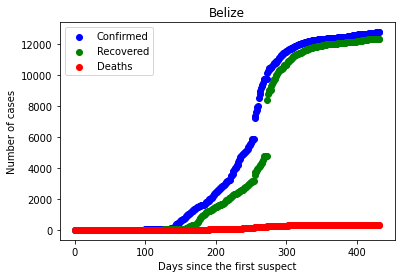

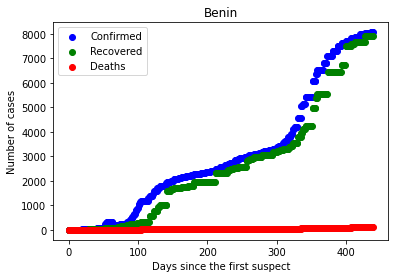

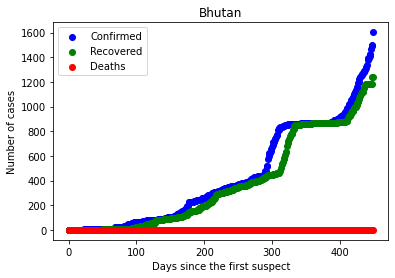

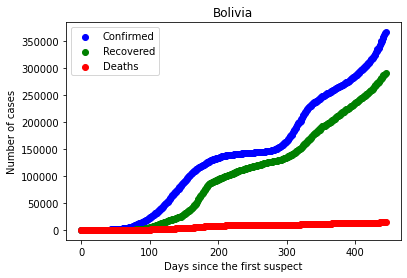

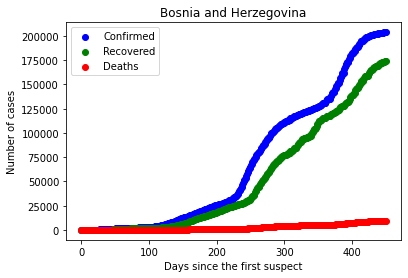

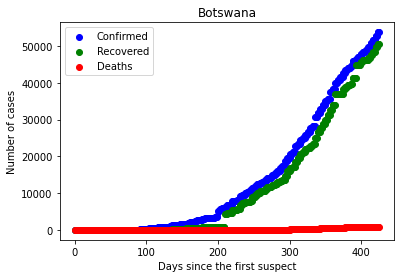

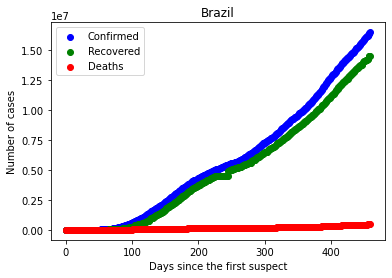

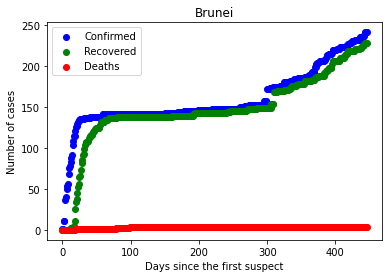

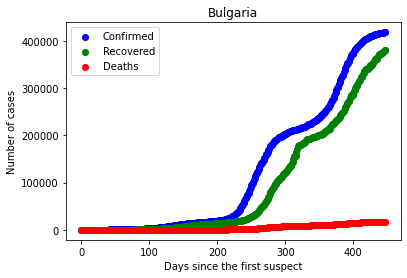

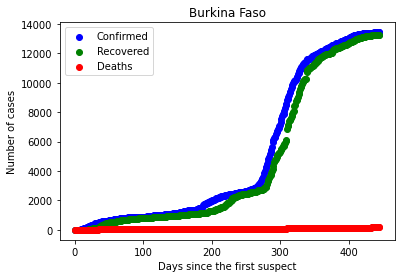

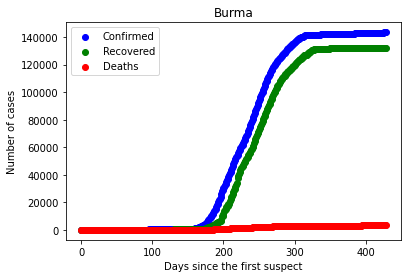

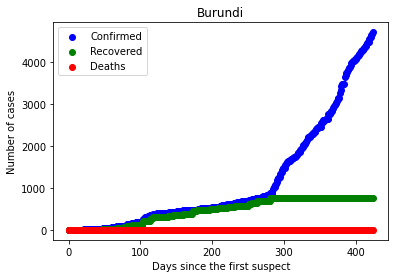

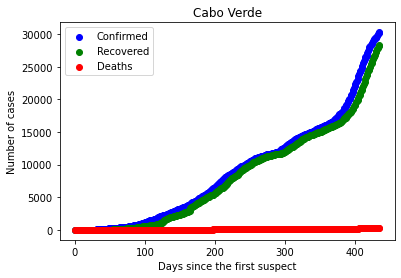

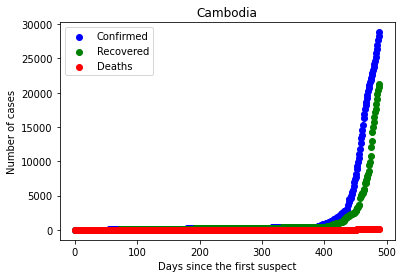

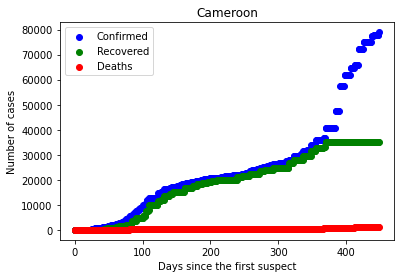

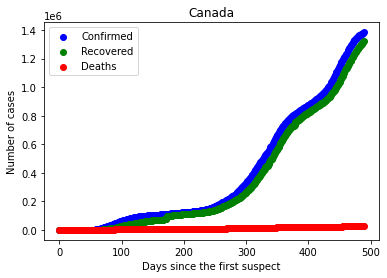

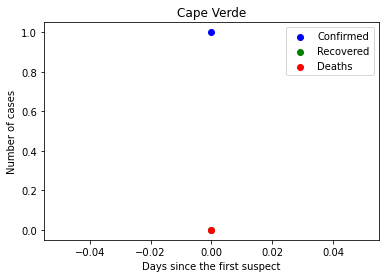

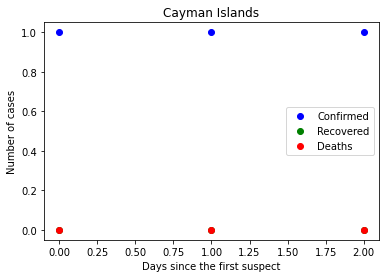

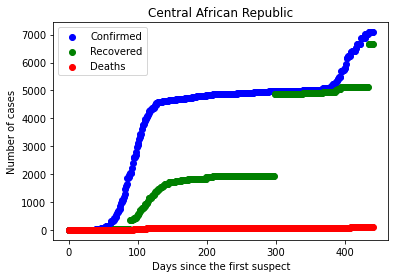

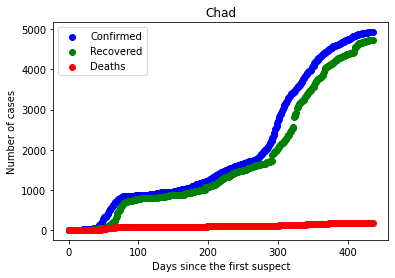

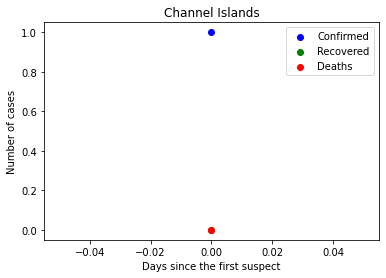

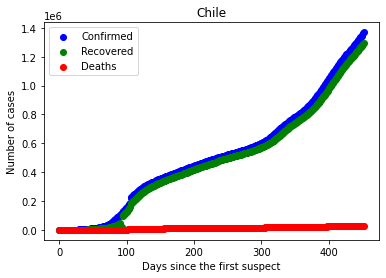

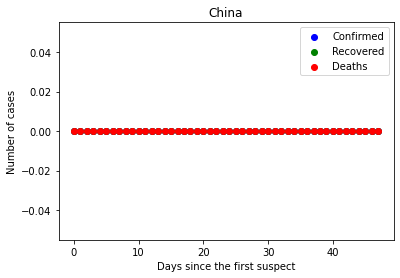

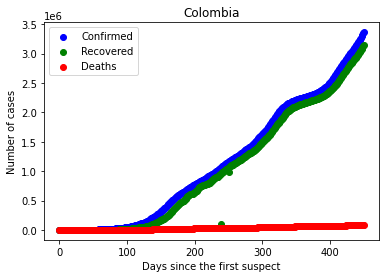

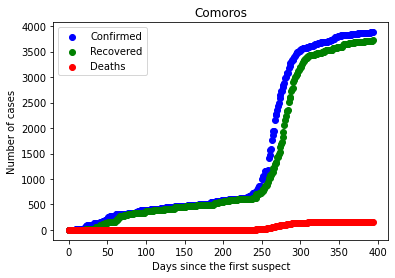

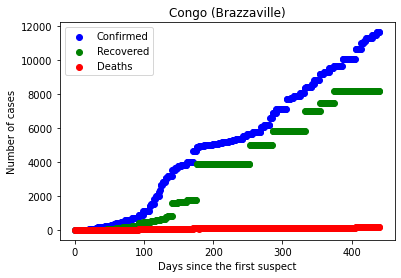

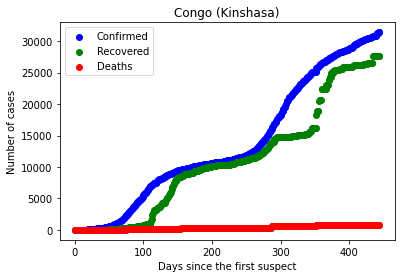

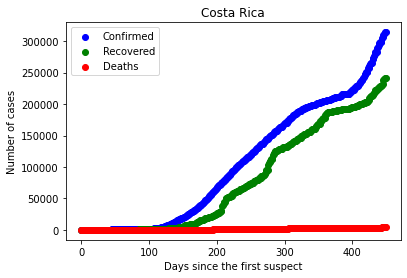

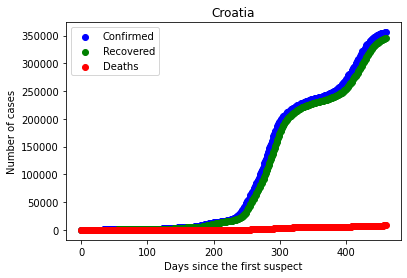

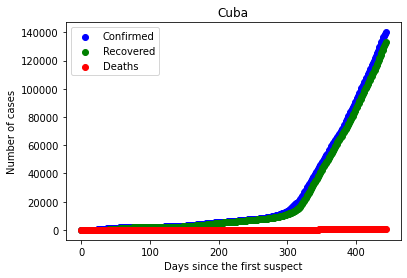

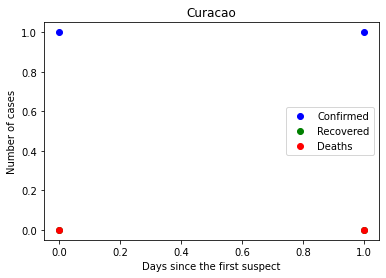

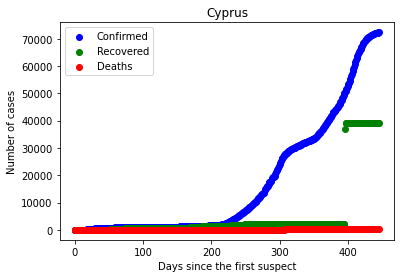

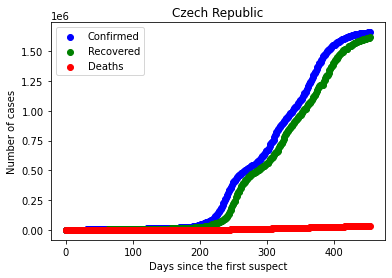

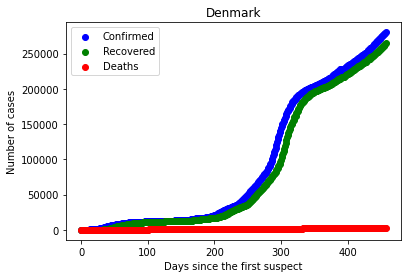

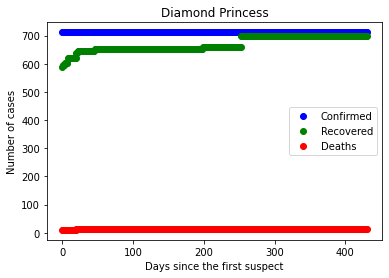

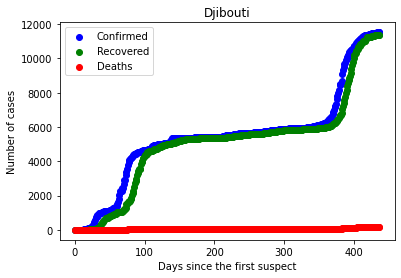

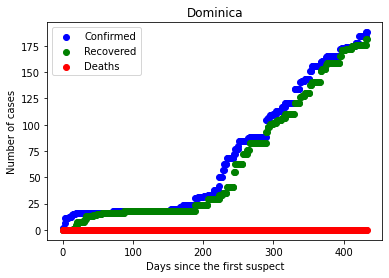

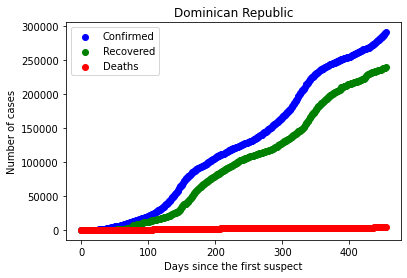

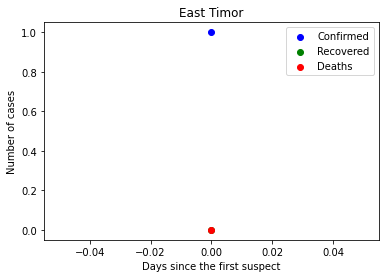

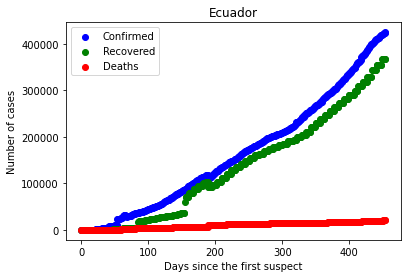

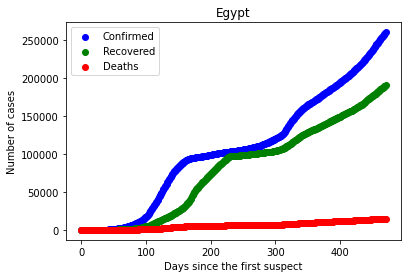

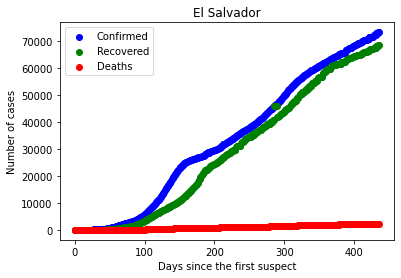

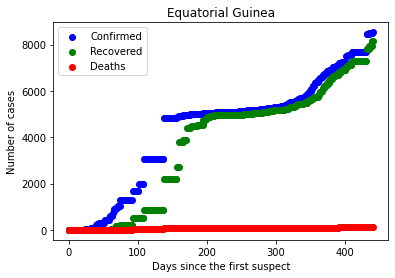

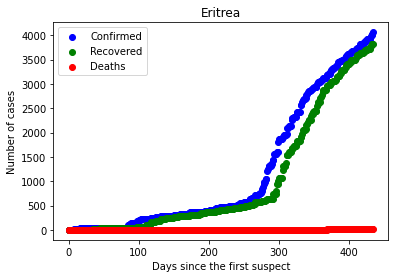

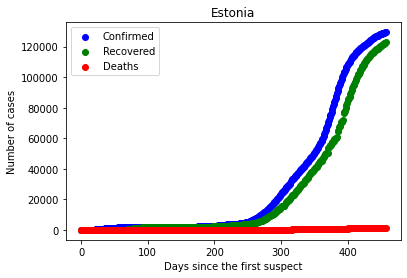

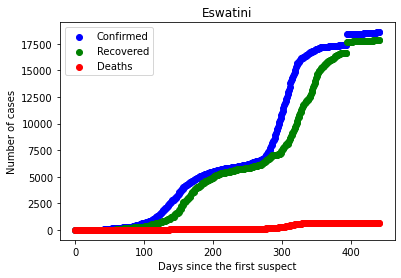

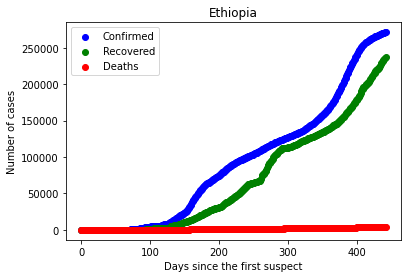

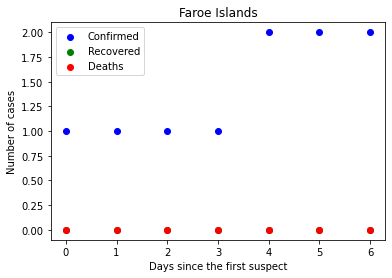

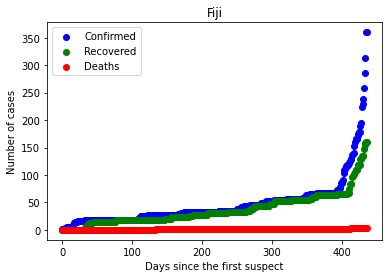

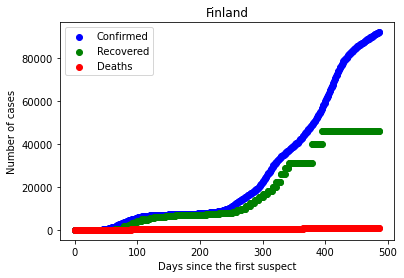

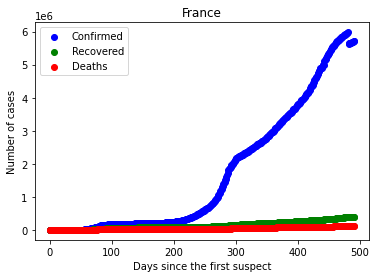

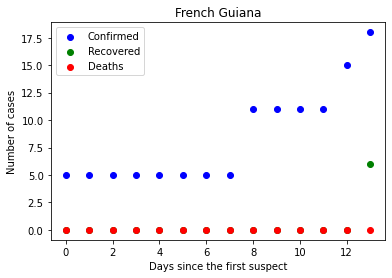

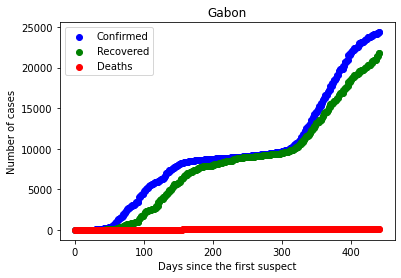

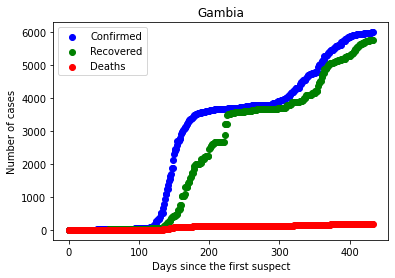

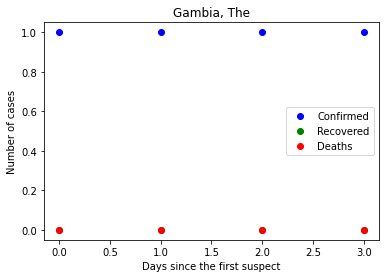

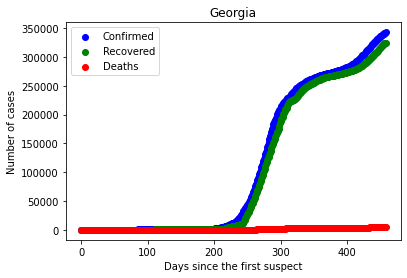

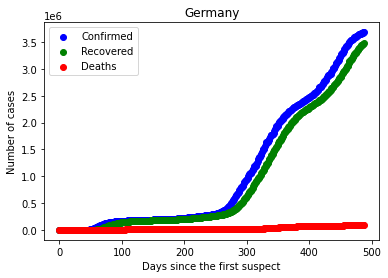

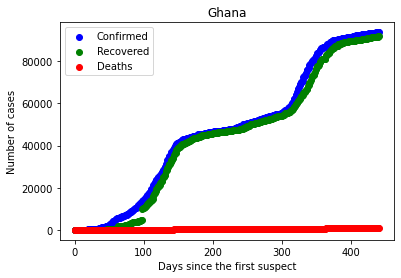

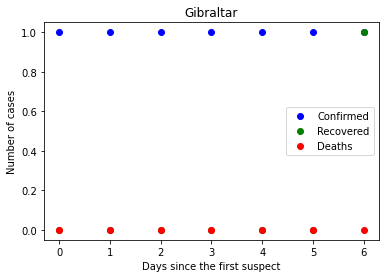

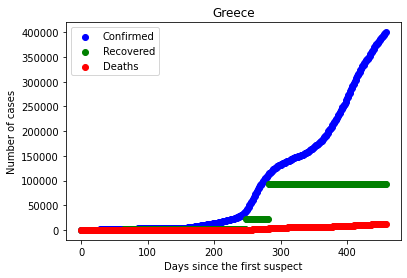

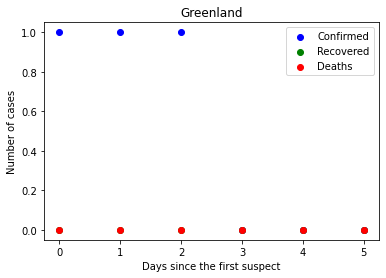

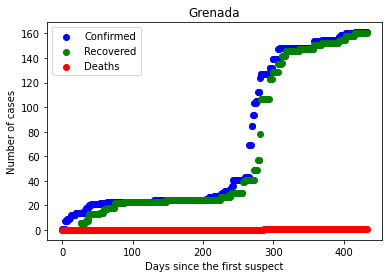

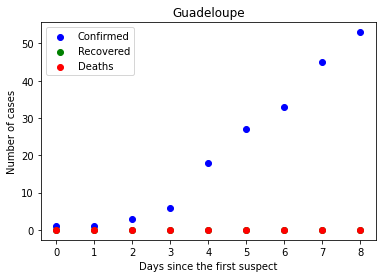

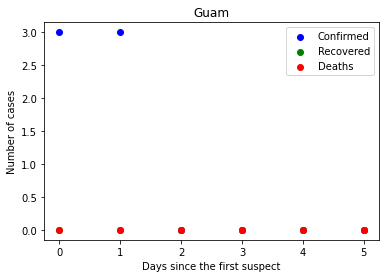

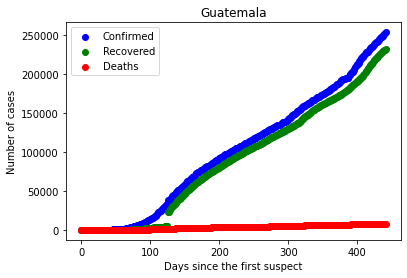

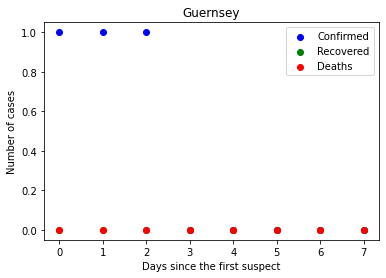

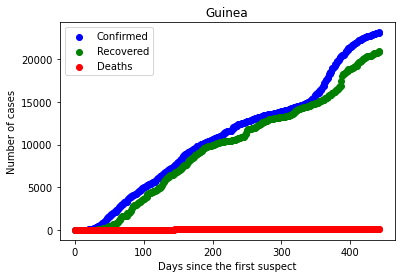

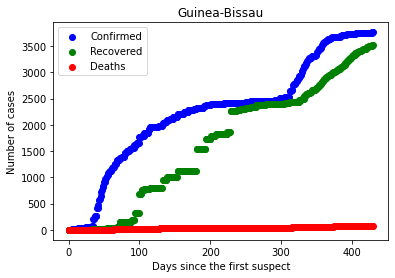

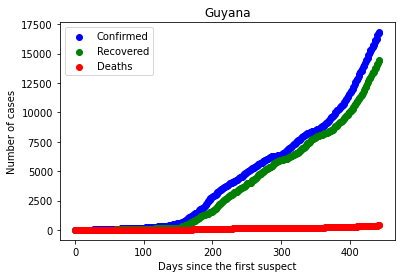

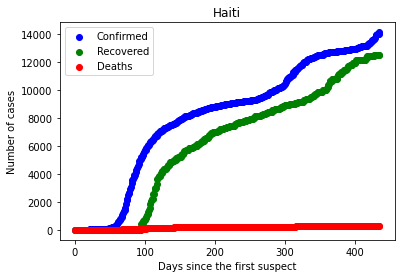

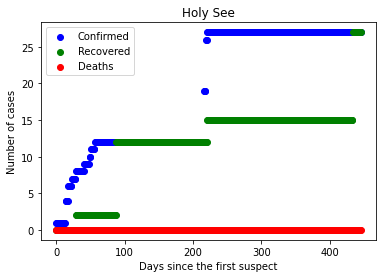

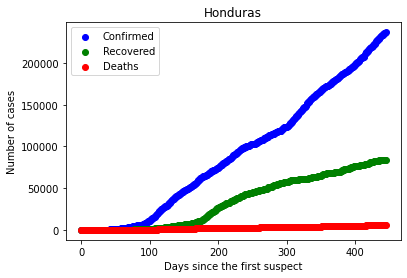

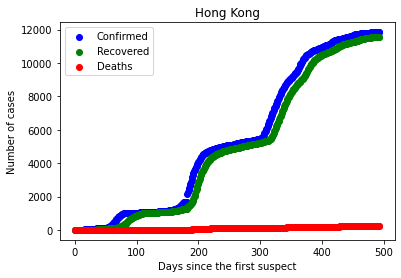

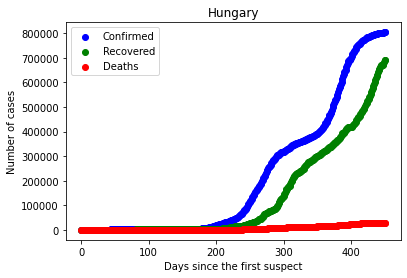

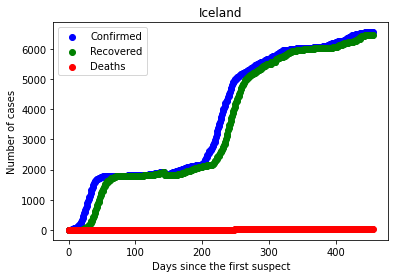

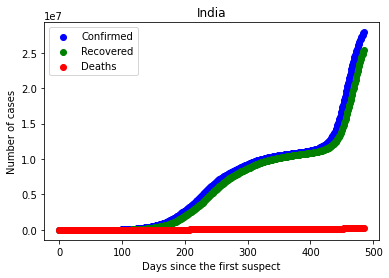

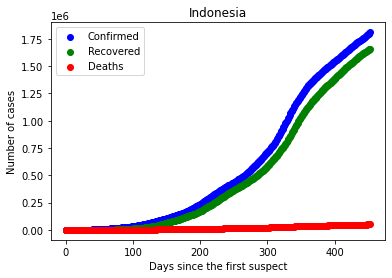

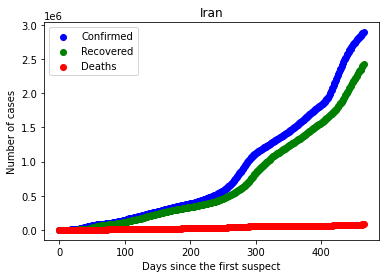

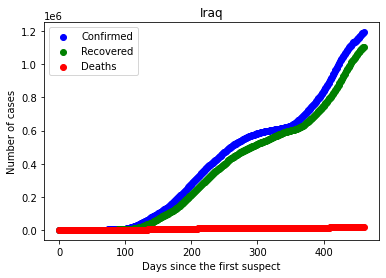

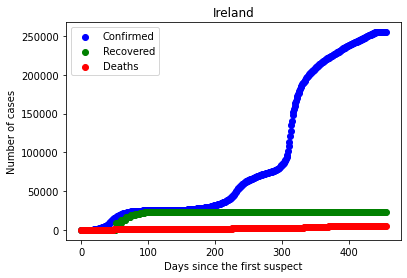

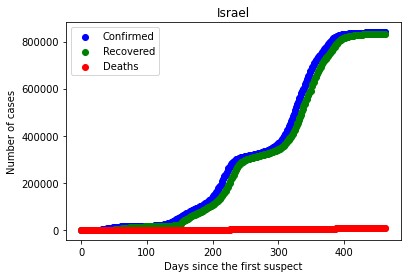

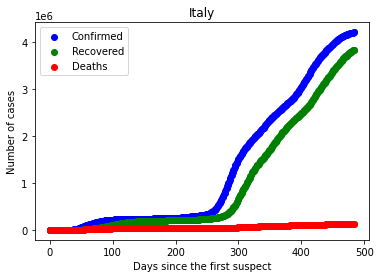

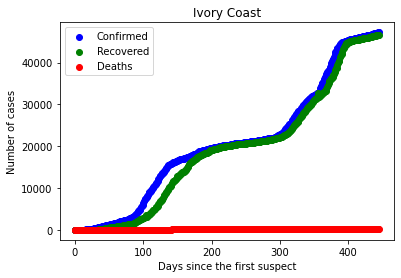

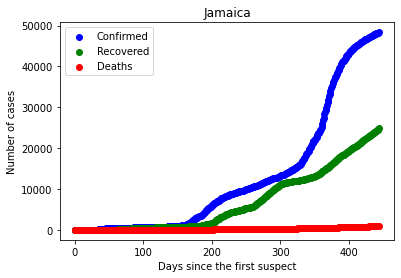

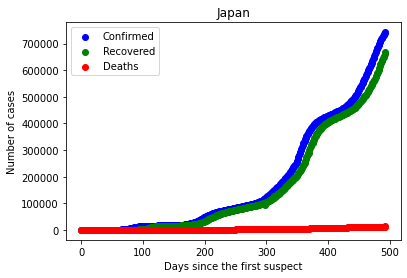

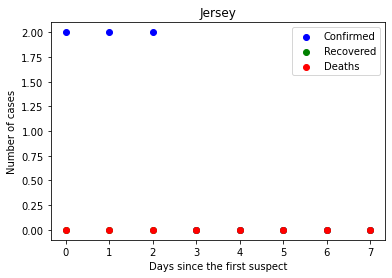

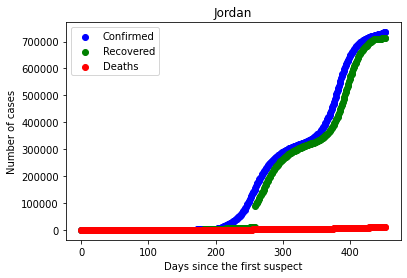

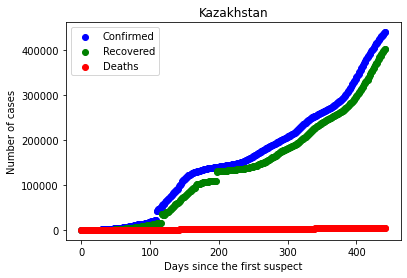

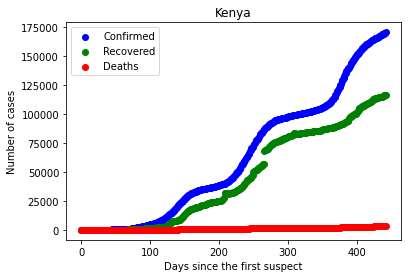

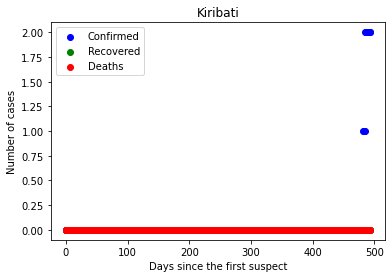

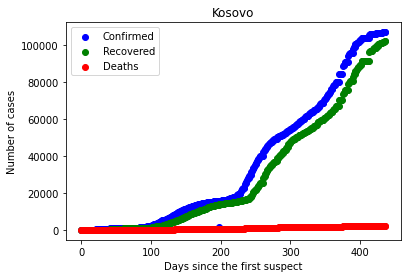

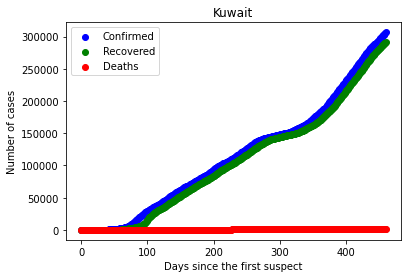

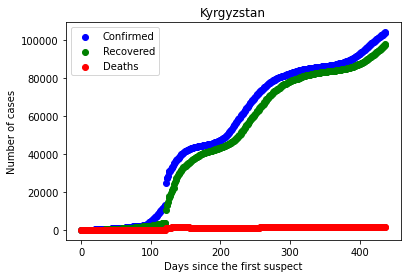

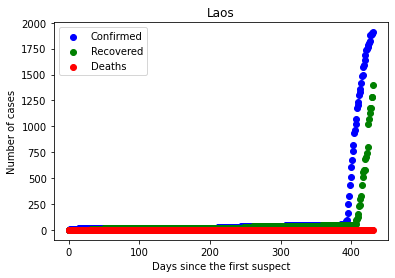

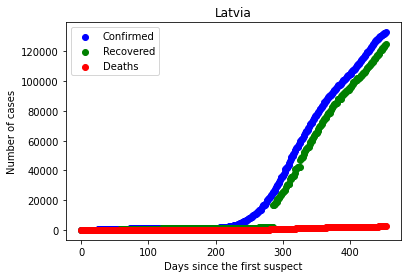

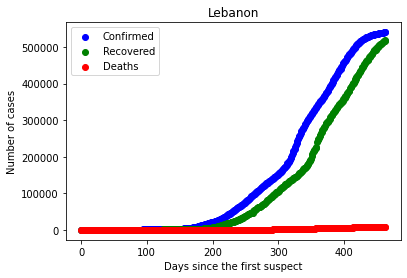

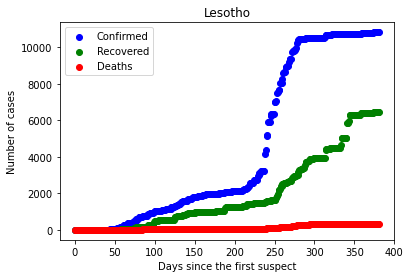

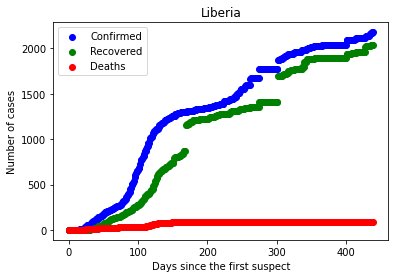

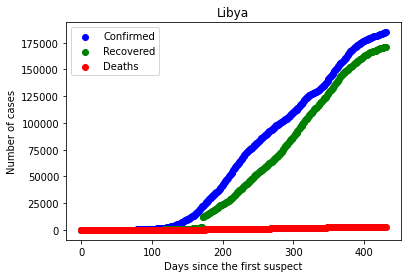

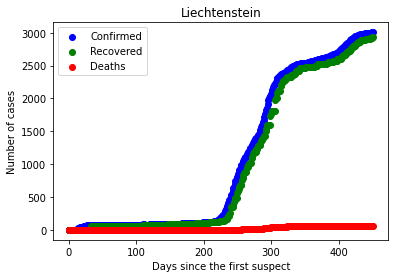

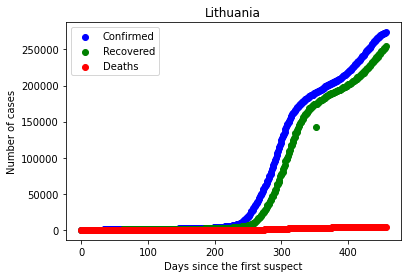

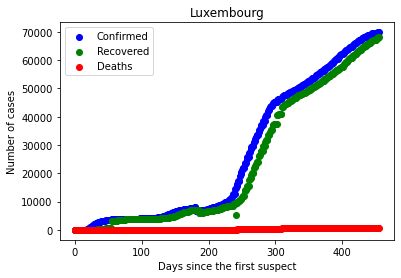

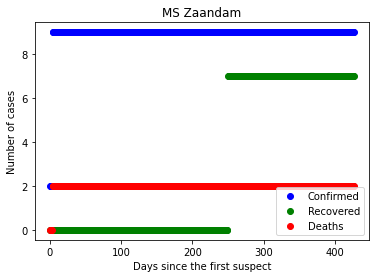

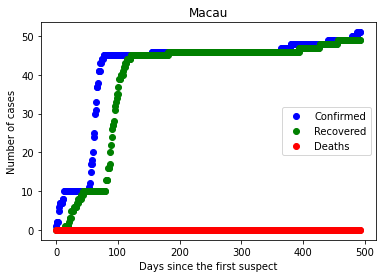

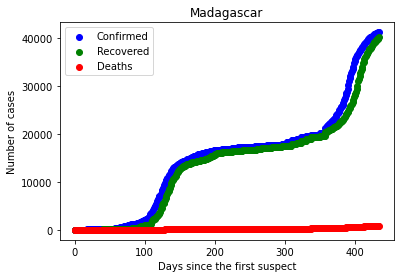

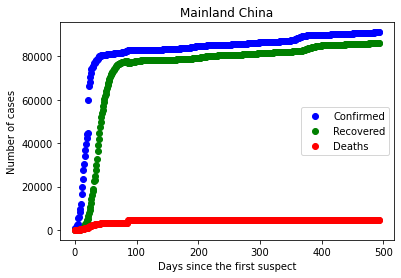

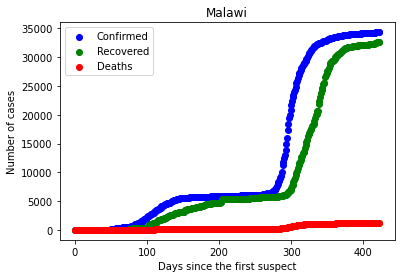

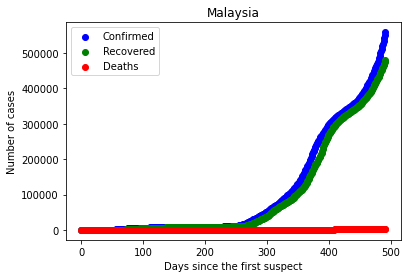

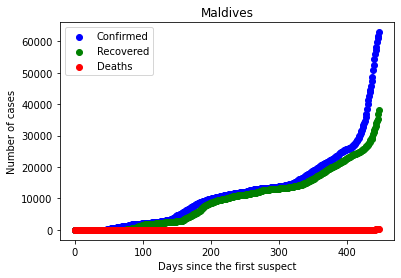

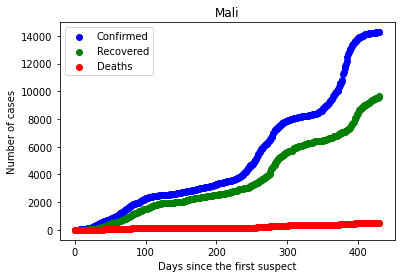

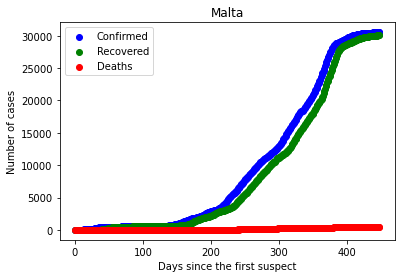

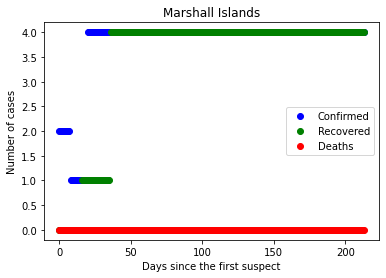

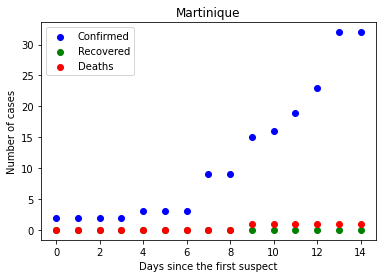

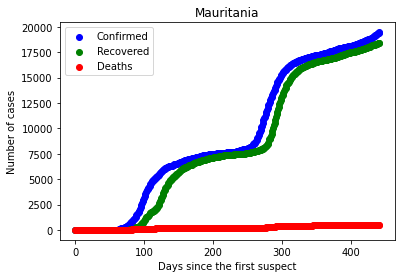

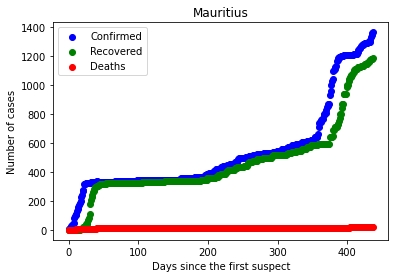

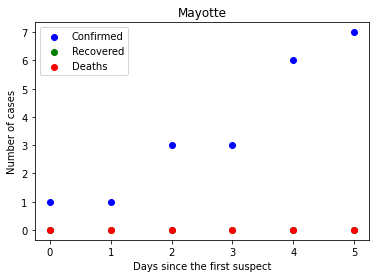

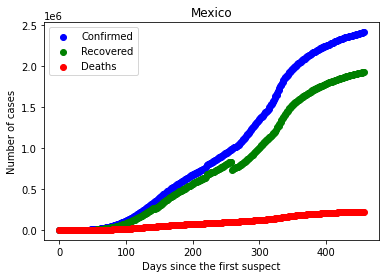

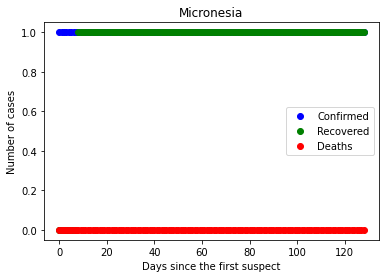

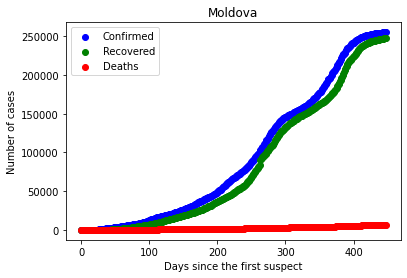

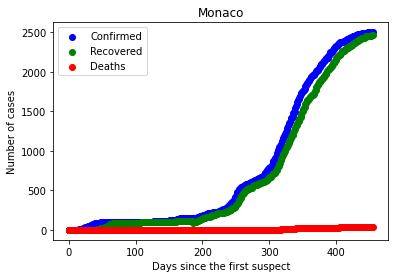

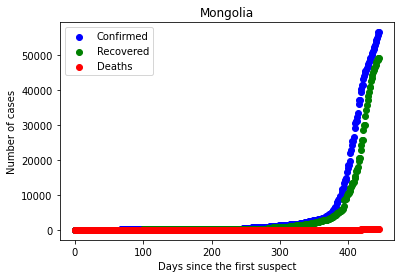

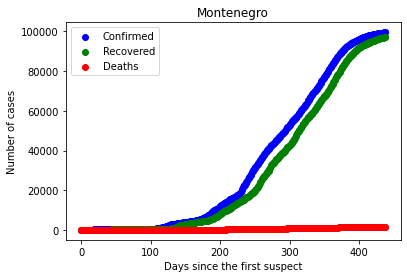

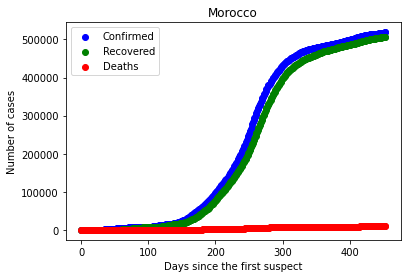

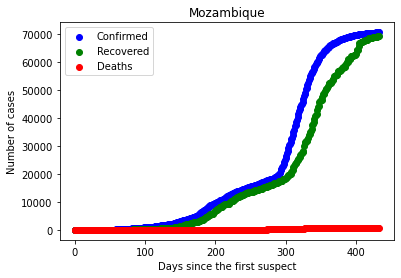

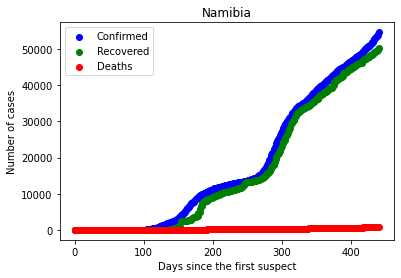

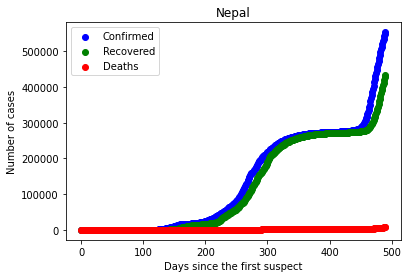

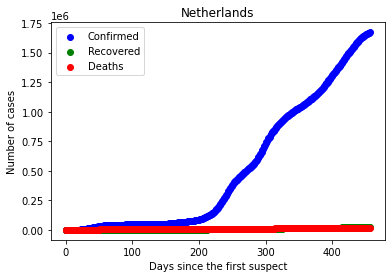

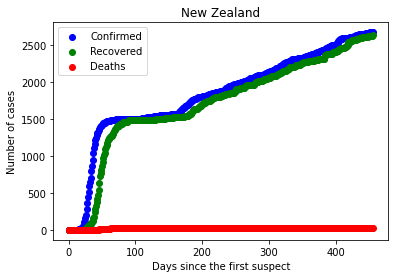

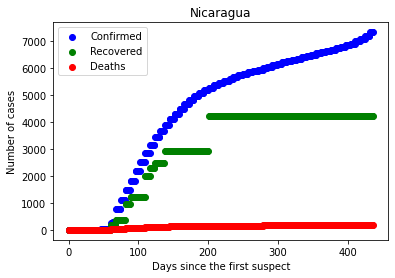

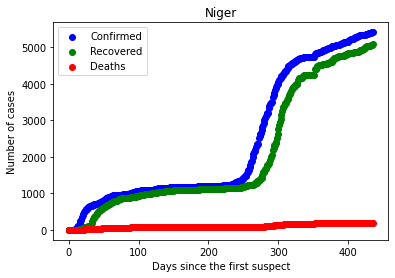

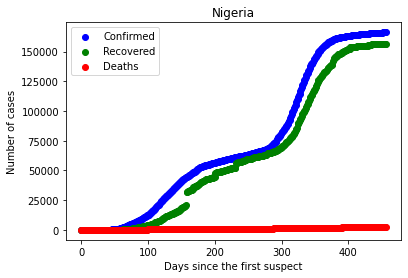

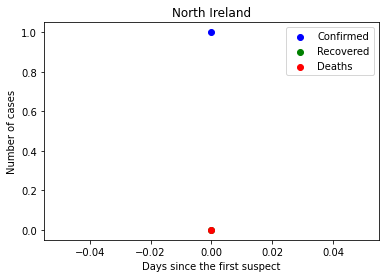

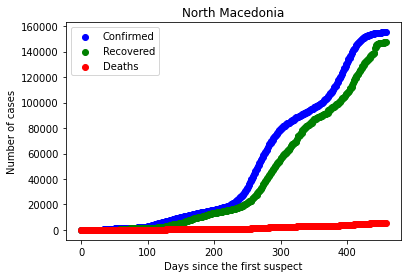

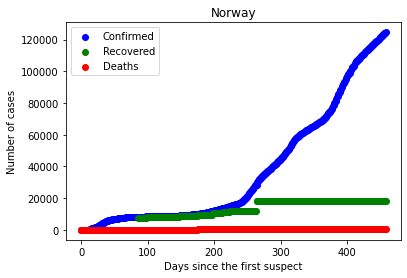

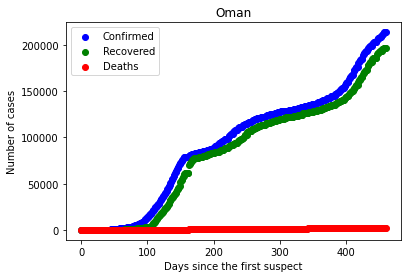

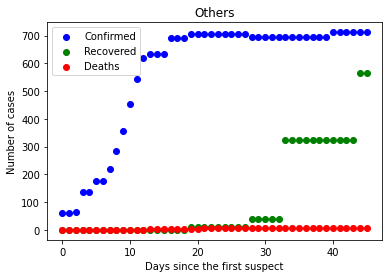

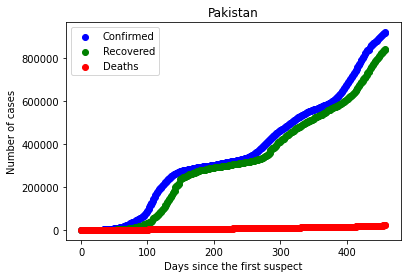

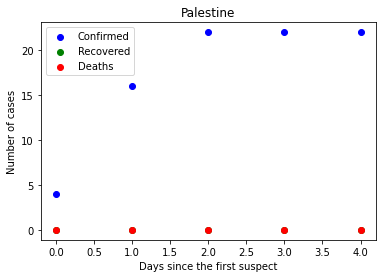

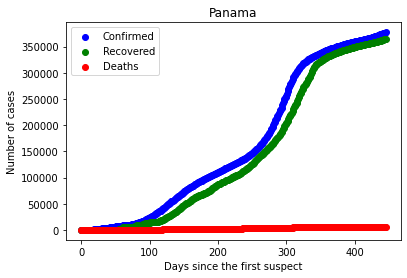

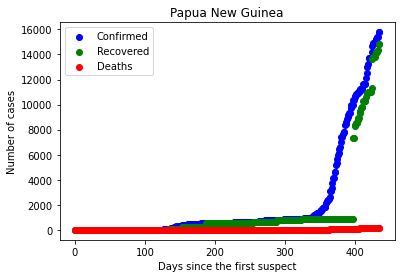

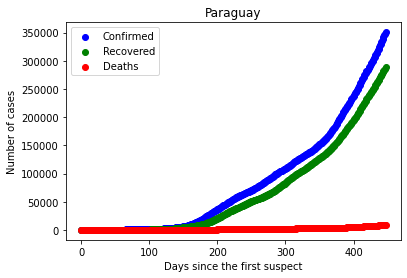

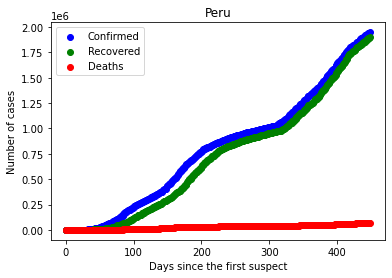

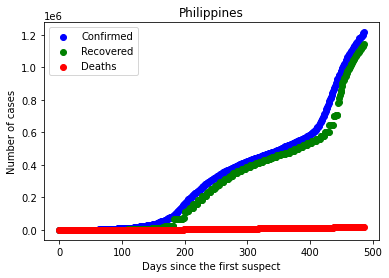

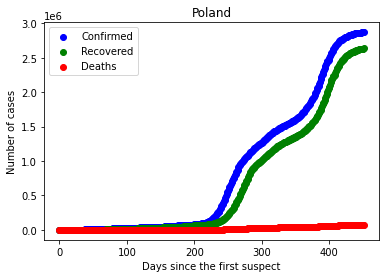

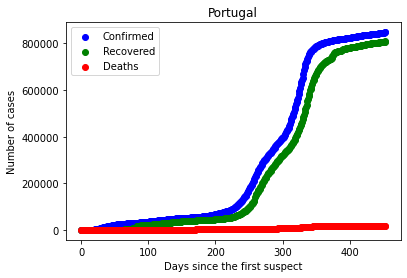

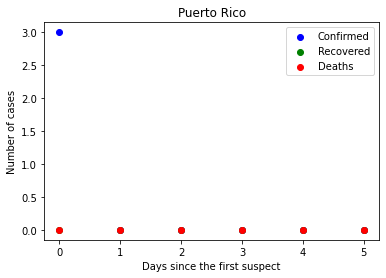

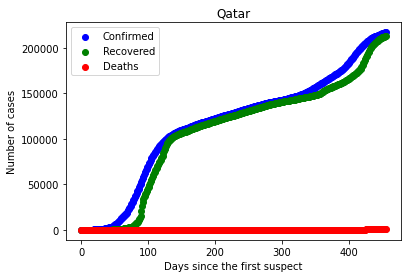

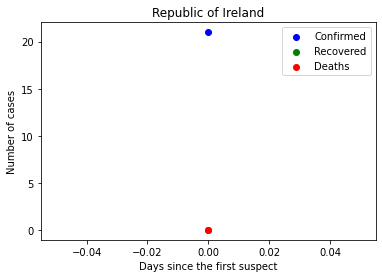

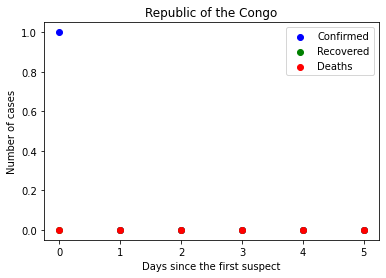

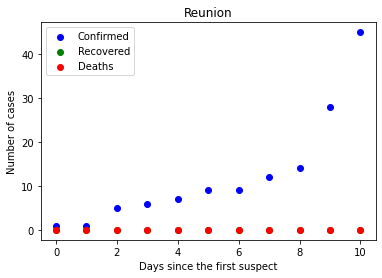

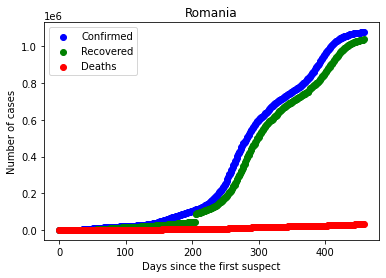

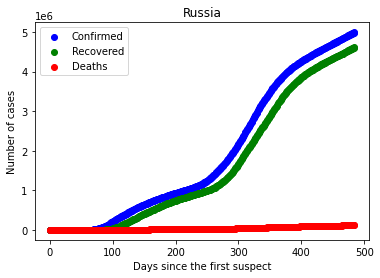

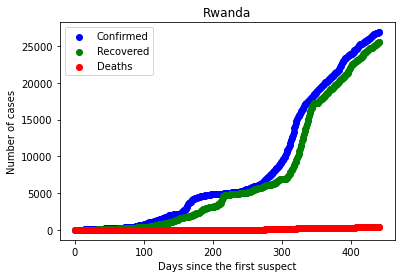

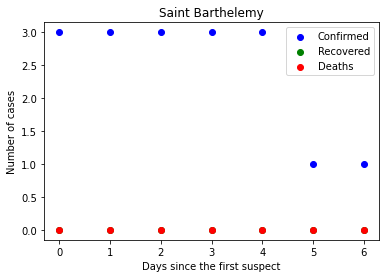

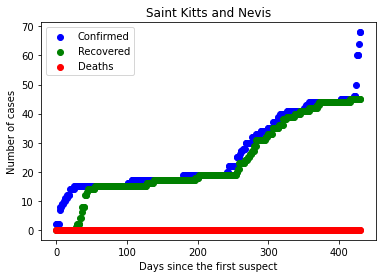

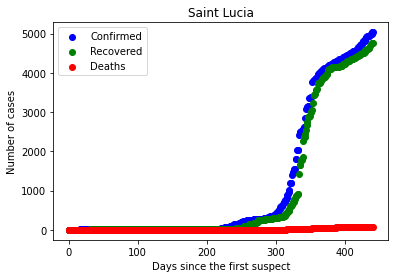

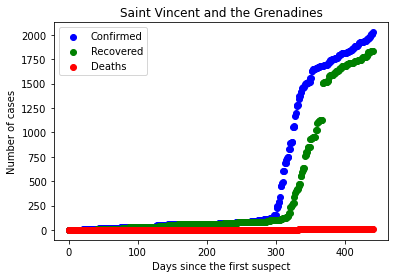

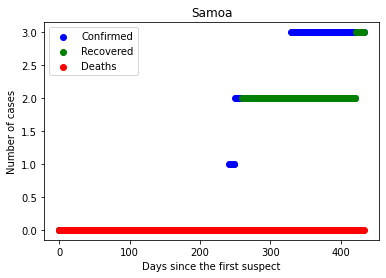

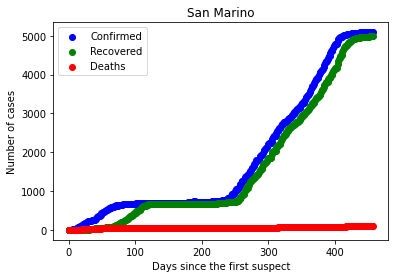

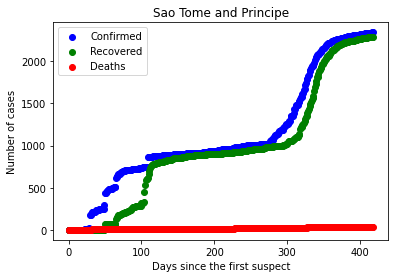

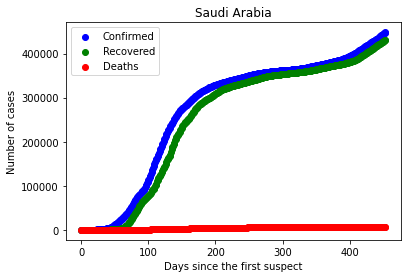

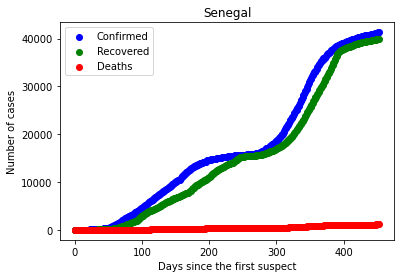

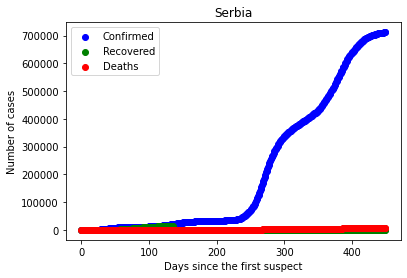

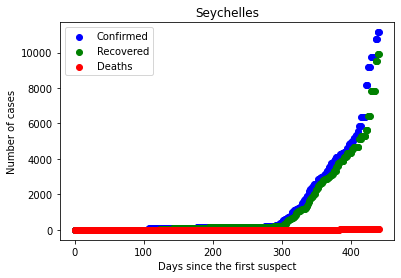

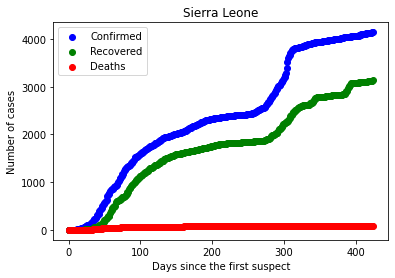

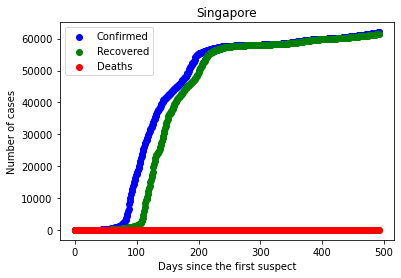

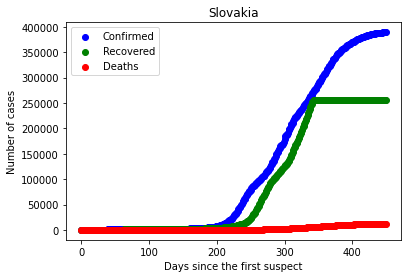

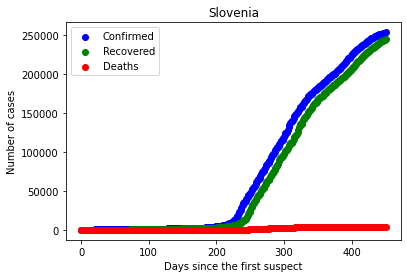

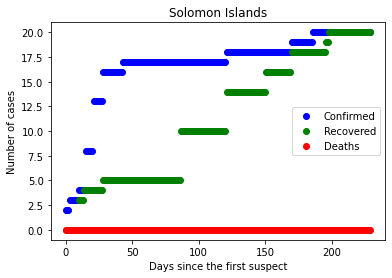

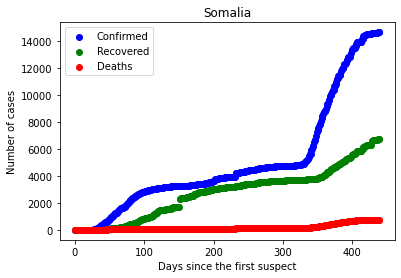

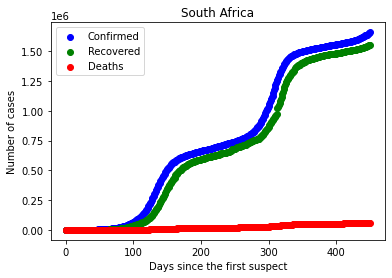

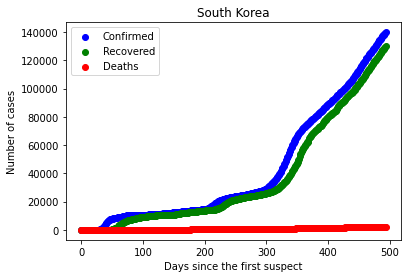

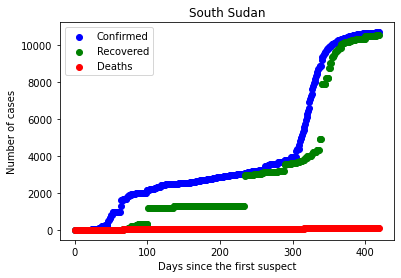

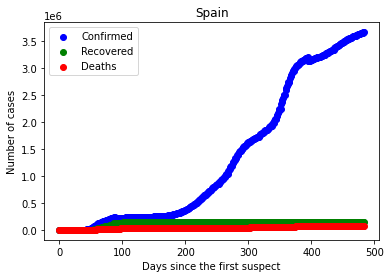

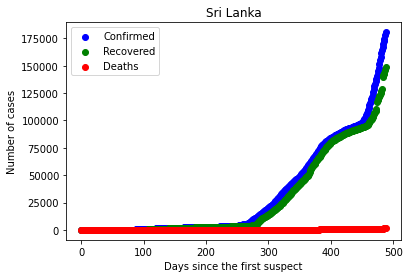

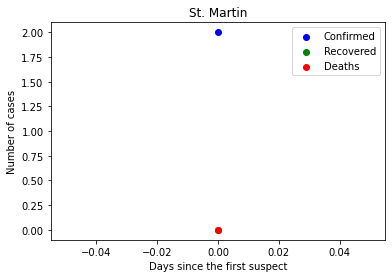

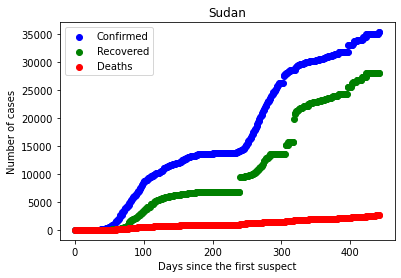

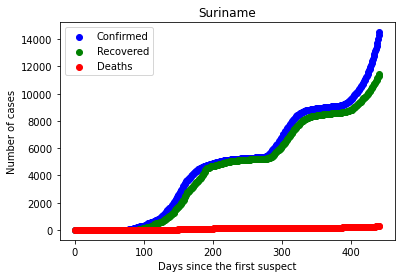

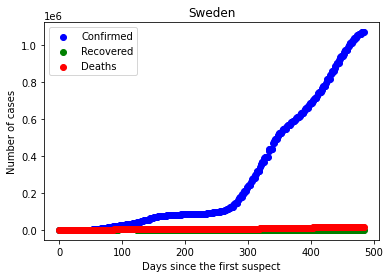

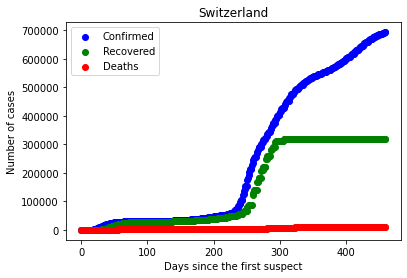

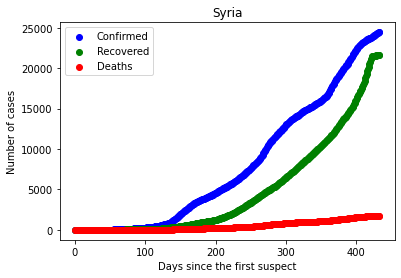

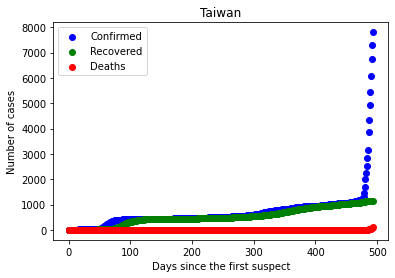

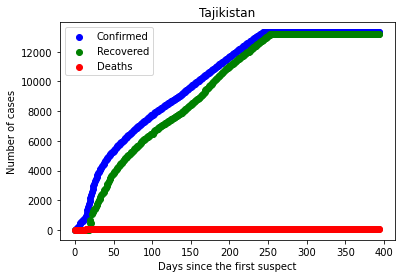

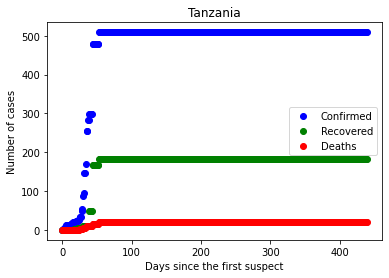

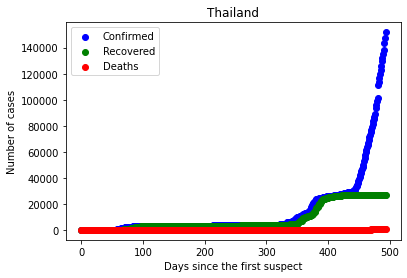

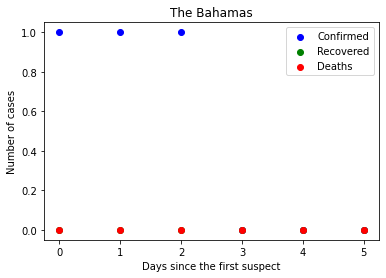

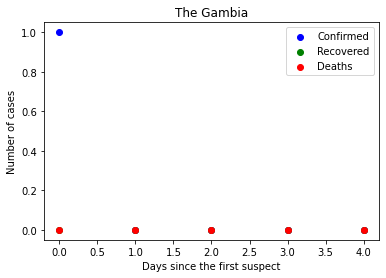

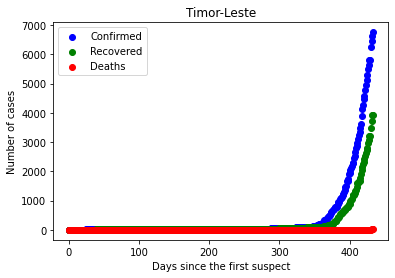

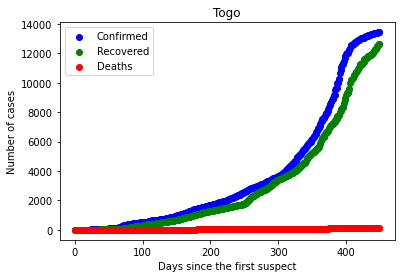

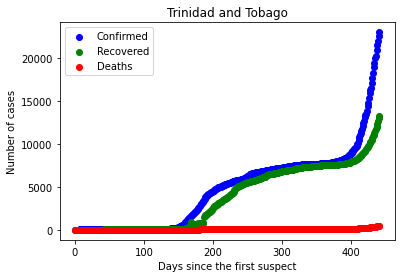

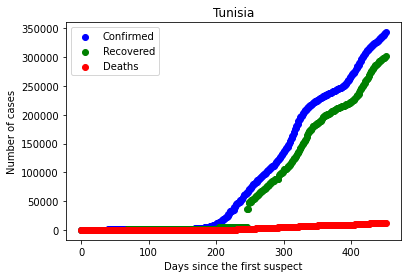

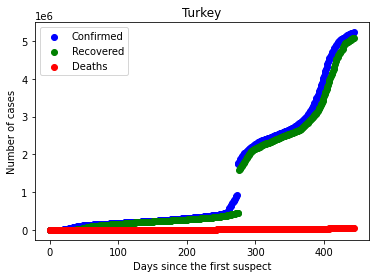

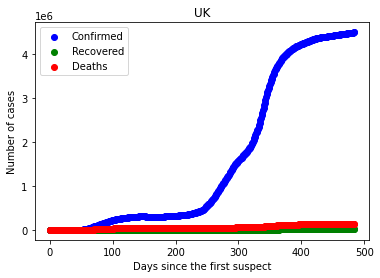

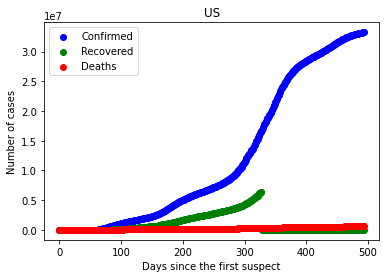

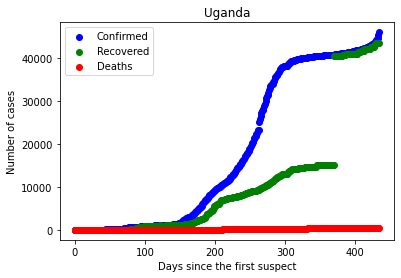

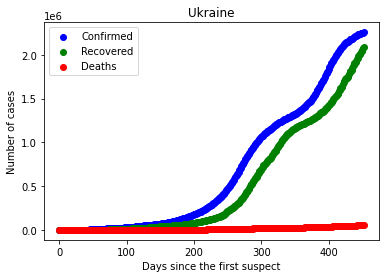

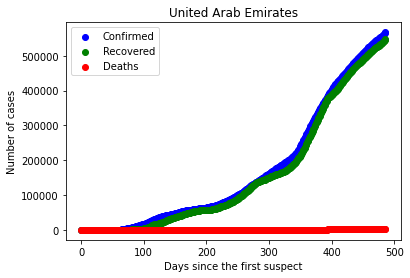

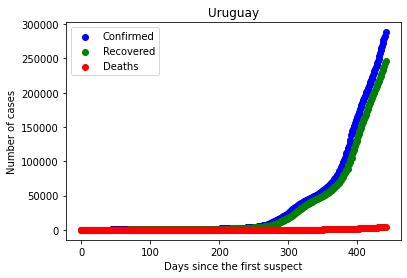

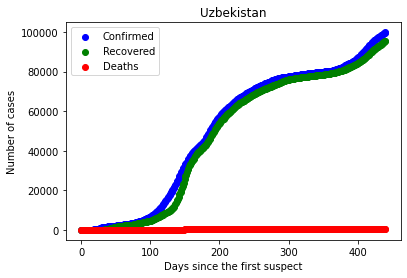

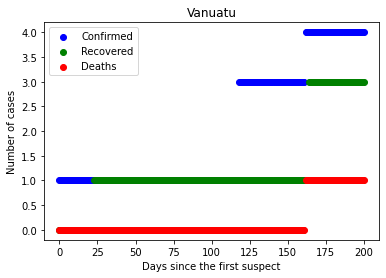

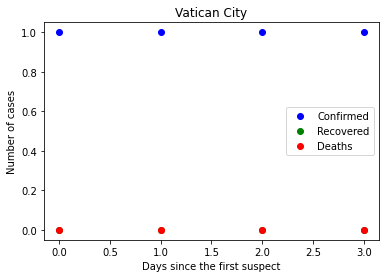

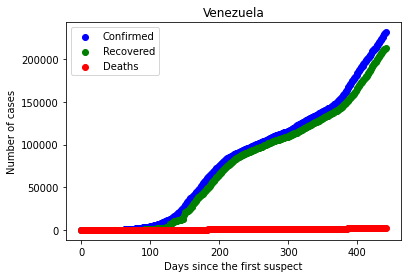

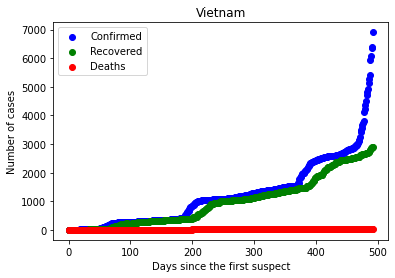

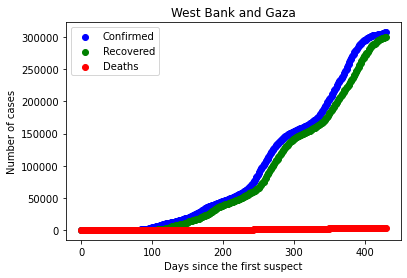

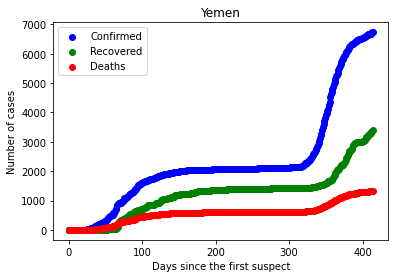

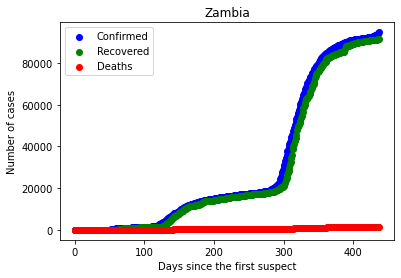

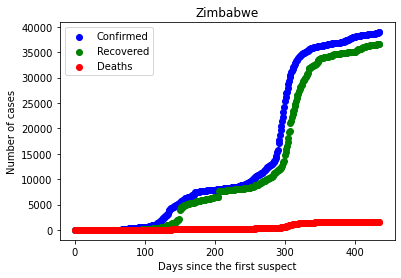

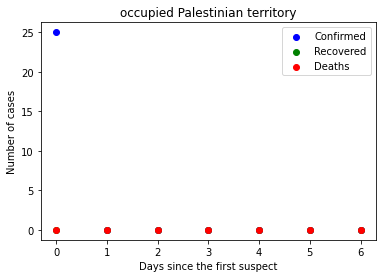

In [34]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()    

In [35]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

# World COVID Cases Trend 

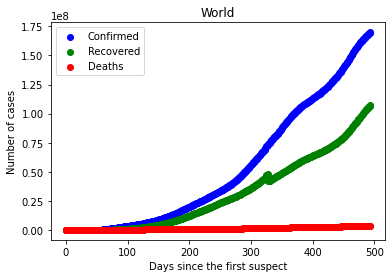

In [36]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()